# Q4
## Telco_customer_churn dataset clustering and elbow curve

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
telco=pd.read_excel("Telco_customer_churn.xlsx")

In [4]:
telco.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [5]:
telco.columns

Index(['Customer ID', 'Count', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [7]:
telco.shape

(7043, 30)

In [8]:
cols= ['Tenure in Months','Monthly Charge','Total Charges','Total Revenue']

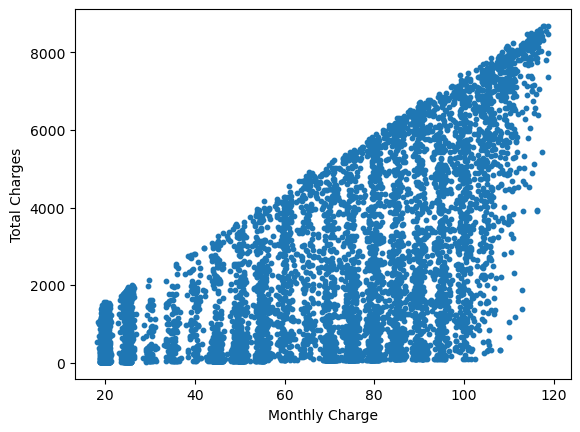

In [15]:
#initial plot
plt.scatter(telco['Monthly Charge'], telco['Total Charges'],s=10)
plt.xlabel('Monthly Charge')
plt.ylabel('Total Charges')
plt.show()

In [17]:
# Preprocessing using Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
df_scaled = scaler.fit_transform(telco[cols])
# Convert the scaled data back to a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=cols)

### Start kmeans clustering

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_scaled)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
telco['cluster'] = y_predicted

In [23]:
telco.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,cluster
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,1
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,1
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,1
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,1
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2


In [24]:
print("Cluster Centers (scaled):")
print(km.cluster_centers_)

Cluster Centers (scaled):
[[0.79590208 0.74153826 0.61270221 0.56732525]
 [0.14398886 0.41229817 0.08102269 0.07974332]
 [0.68861791 0.16196312 0.19351657 0.22072088]]


In [25]:
centroids_original = scaler.inverse_transform(km.cluster_centers_)
print("Cluster Centers (original scale):")
print(centroids_original)

Cluster Centers (original scale):
[[  57.50904762   92.77459524 5328.47730952 6805.42395714]
 [  11.22320933   59.68596613  720.94266796  974.92908384]
 [  49.89187174   34.52729306 1695.81461596 2660.73588367]]


In [26]:
#Create dataframes for 
df1 = telco[telco.cluster == 0]
df2 = telco[telco.cluster == 1]
df3 = telco[telco.cluster == 2]

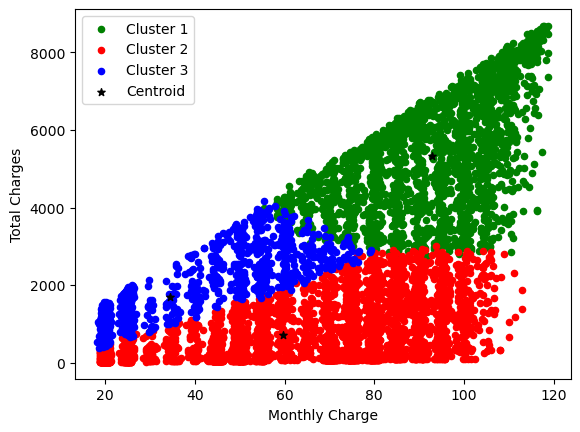

In [32]:
#Plotting the clusters
plt.scatter(df1['Monthly Charge'], df1['Total Charges'], color='green', label='Cluster 1',s=20)
plt.scatter(df2['Monthly Charge'], df2['Total Charges'], color='red', label='Cluster 2',s=20)
plt.scatter(df3['Monthly Charge'], df3['Total Charges'], color='blue', label='Cluster 3',s=20)
plt.scatter(centroids_original[:, 1], centroids_original[:, 2], color='black', marker='*', s=30, label='Centroid')
plt.xlabel('Monthly Charge')
plt.ylabel('Total Charges')
plt.legend()
plt.show()

## Elbow Curve

In [33]:
# Apply normalization to the selected columns
df_norm = scaler.fit_transform(telco[cols])

In [34]:
#determine number of clusters
TWSS = []
k = list(range(2, 8)) 

In [35]:
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)  # Total within-cluster sum of squares (inertia)

C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\cluster\_k

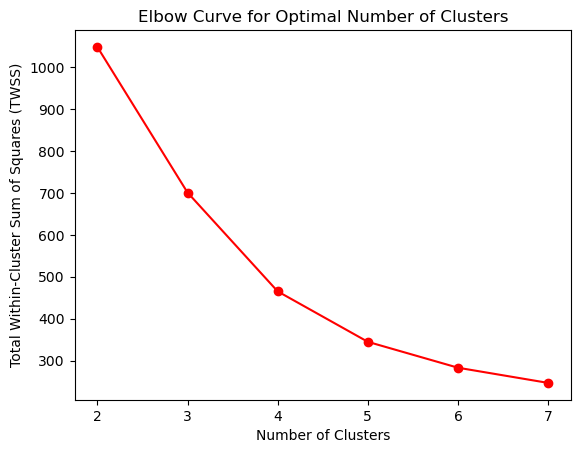

In [36]:
# Plotting the Elbow Curve
plt.plot(k, TWSS, 'ro-')
plt.xlabel("Number of Clusters")
plt.ylabel("Total Within-Cluster Sum of Squares (TWSS)")
plt.title("Elbow Curve for Optimal Number of Clusters")
plt.show()